In [22]:
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
import pandas as pd
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import os

In [2]:
df = pd.read_csv('data/wine.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=True)

In [5]:
model = models.Sequential()
model.add(layers.Dense(30, input_dim=12, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
MODEL_DIR = 'model/'

if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = MODEL_DIR + '{epoch:02d}-{val_accuracy:.4f}.hdf5'

checkpoint = ModelCheckpoint(filepath=modelpath, verbose=1)

In [8]:
h = model.fit(X_train, y_train, epochs=50, batch_size=500,
             validation_split=0.25, verbose=0, callbacks=[checkpoint])


Epoch 1: saving model to model\01-0.8646.hdf5

Epoch 2: saving model to model\02-0.8185.hdf5

Epoch 3: saving model to model\03-0.9031.hdf5

Epoch 4: saving model to model\04-0.9269.hdf5

Epoch 5: saving model to model\05-0.9208.hdf5

Epoch 6: saving model to model\06-0.9323.hdf5

Epoch 7: saving model to model\07-0.9323.hdf5

Epoch 8: saving model to model\08-0.9308.hdf5

Epoch 9: saving model to model\09-0.9269.hdf5

Epoch 10: saving model to model\10-0.9300.hdf5

Epoch 11: saving model to model\11-0.9315.hdf5

Epoch 12: saving model to model\12-0.9369.hdf5

Epoch 13: saving model to model\13-0.9354.hdf5

Epoch 14: saving model to model\14-0.9354.hdf5

Epoch 15: saving model to model\15-0.9338.hdf5

Epoch 16: saving model to model\16-0.9331.hdf5

Epoch 17: saving model to model\17-0.9369.hdf5

Epoch 18: saving model to model\18-0.9369.hdf5

Epoch 19: saving model to model\19-0.9369.hdf5

Epoch 20: saving model to model\20-0.9369.hdf5

Epoch 21: saving model to model\21-0.9377.hdf5



In [12]:
score = model.evaluate(X_test, y_test)
print('Test Accuracy : %.4f' % (score[1]))

41/41 [==============================] - 0s 1ms/step - loss: 0.1300 - accuracy: 0.9546
Test Accuracy : 0.9546


In [13]:
model = models.Sequential()
model.add(layers.Dense(30, input_dim=12, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [15]:
import matplotlib.pyplot as plt

In [16]:
h = model.fit(X_train, y_train, epochs=2000, batch_size=500,
             validation_split=0.25, verbose=0)

In [19]:
hist_df = pd.DataFrame(h.history)
hist_df.head()

,loss,accuracy,val_loss,val_accuracy
0,6.445968,0.250962,2.705348,0.233077
1,1.098937,0.557352,0.270117,0.920000
2,0.359120,0.876059,0.418524,0.856154
3,0.470317,0.848088,0.442617,0.856154
4,0.440289,0.862972,0.361258,0.878462


In [20]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   loss          2000 non-null   float64
 1   accuracy      2000 non-null   float64
 2   val_loss      2000 non-null   float64
 3   val_accuracy  2000 non-null   float64
dtypes: float64(4)
memory usage: 62.6 KB


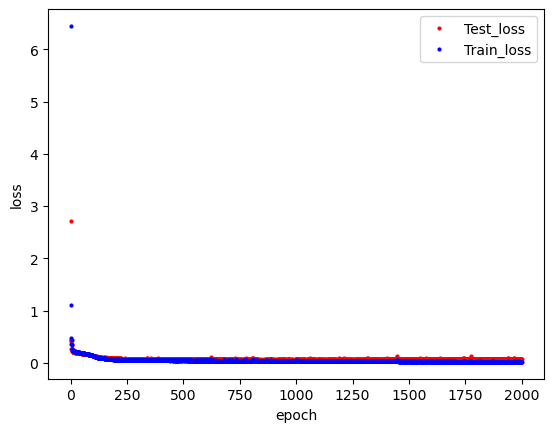

In [23]:
y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label='Test_loss')
plt.plot(x_len, y_loss, 'o', c='blue', markersize=2, label='Train_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()